In [1]:
! pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader #데이터를 특정 길이로 읽어오기
import torch.nn as nn 
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [3]:
USE_CUDA=torch.cuda.is_available()
print(USE_CUDA)
device=torch.device('cuda' if USE_CUDA else 'cpu')
print("다음기기 사용:", device)

False
다음기기 사용: cpu


In [4]:
random.seed(777)
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
epochs=30
batch_size=100

In [6]:
mnist_train=dsets.MNIST(root='MNIST_data/', 
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/', 
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.28MB/s]


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 164kB/s]


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [7]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [8]:
data_loader=DataLoader(dataset=mnist_train, 
                       batch_size=batch_size,
                       shuffle=True,
                       drop_last=True)

In [11]:
for X, Y in data_loader:
    print(X.size(), Y.size())

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

In [12]:
print(len(data_loader))

600


In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌

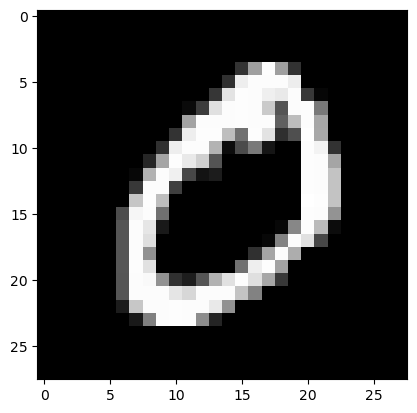

In [14]:
import matplotlib.pyplot as plt
plt.imshow(mnist_train.data[1].view(28,28), cmap='grey')
plt.show()

In [15]:
print(mnist_train.targets[1])

tensor(0)


In [16]:
model=nn.Linear(784,10, bias=True).to(device)
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(model.parameters(), lr=0.1)

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0232, -0.0169, -0.0135,  ...,  0.0294,  0.0074,  0.0185],
         [-0.0082,  0.0136, -0.0266,  ..., -0.0213,  0.0066,  0.0015],
         [ 0.0273,  0.0264, -0.0183,  ...,  0.0080, -0.0312, -0.0246],
         ...,
         [-0.0268, -0.0063,  0.0181,  ..., -0.0080,  0.0300,  0.0083],
         [ 0.0143, -0.0169,  0.0290,  ...,  0.0053,  0.0015, -0.0130],
         [-0.0020, -0.0005,  0.0236,  ...,  0.0345,  0.0230,  0.0343]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0262, -0.0135,  0.0185,  0.0145,  0.0128, -0.0055, -0.0190, -0.0140,
         -0.0354,  0.0124], requires_grad=True)]

In [18]:
for epoch in range(epochs):
    avg_cost=0
    total_batch=len(data_loader)

    for X,Y in data_loader:
        X=X.view(-1,28*28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=model(X)
        cost=criterion(y_hat, Y)

        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
    
    print('epoch', epoch, 'cost:', avg_cost.item())
print("Learning finished")

epoch 0 cost: 0.533626914024353
epoch 1 cost: 0.358639657497406
epoch 2 cost: 0.3308641314506531
epoch 3 cost: 0.31646180152893066
epoch 4 cost: 0.3066854476928711
epoch 5 cost: 0.30013400316238403
epoch 6 cost: 0.2945343852043152
epoch 7 cost: 0.29072830080986023
epoch 8 cost: 0.28722119331359863
epoch 9 cost: 0.28413262963294983
epoch 10 cost: 0.2816755175590515
epoch 11 cost: 0.2794869840145111
epoch 12 cost: 0.27766290307044983
epoch 13 cost: 0.2758179008960724
epoch 14 cost: 0.2743093967437744
epoch 15 cost: 0.2730748951435089
epoch 16 cost: 0.2715650498867035
epoch 17 cost: 0.2703782618045807
epoch 18 cost: 0.2692151665687561
epoch 19 cost: 0.26844334602355957
epoch 20 cost: 0.2673802971839905
epoch 21 cost: 0.2665393650531769
epoch 22 cost: 0.26542001962661743
epoch 23 cost: 0.2647182047367096
epoch 24 cost: 0.26395419239997864
epoch 25 cost: 0.26305314898490906
epoch 26 cost: 0.26236894726753235
epoch 27 cost: 0.261716365814209
epoch 28 cost: 0.26140350103378296
epoch 29 cost: 

In [26]:
with torch.no_grad(): #gradient 연산을 수행하지 않도록 함
    x_test = mnist_test.data.view(-1, 28*28).float().to(device)

    #print(x_test)
    y_test = mnist_test.targets.to(device)
    print(y_test.size())
    
    prediction = model(x_test)
    #print(torch.argmax(prediction[0]))
    correct_pred = y_test == torch.argmax(prediction, 1) #만 개의 데이터가 놓여져있는데, 그 중 1인 dim을 나타냄

    print(correct_pred[0:10])
    accuracy = correct_pred.float().mean()
    print('Accuracy:', accuracy)

torch.Size([10000])
tensor([ True,  True,  True,  True,  True,  True,  True,  True, False,  True])
Accuracy: tensor(0.8755)
